In [1]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "jax"

In [2]:
import keras

(train_images, train_labels), (eval_images, eval_labels) = keras.datasets.mnist.load_data()


In [3]:
train_images = train_images.astype("float32") / 255
eval_images = eval_images.astype("float32") / 255
train_images = np.expand_dims(train_images, -1)
eval_images = np.expand_dims(eval_images, -1)

# b = np.zeros((eval_labels.size, eval_labels.max() + 1))
# b[np.arange(eval_labels.size), eval_labels] = 1
# eval_labels = b

# a = np.zeros((train_labels.size, train_labels.max() + 1))
# a[np.arange(train_labels.size), train_labels] = 1
# train_labels = a
# print(train_labels.shape)

(28, 28, 1)


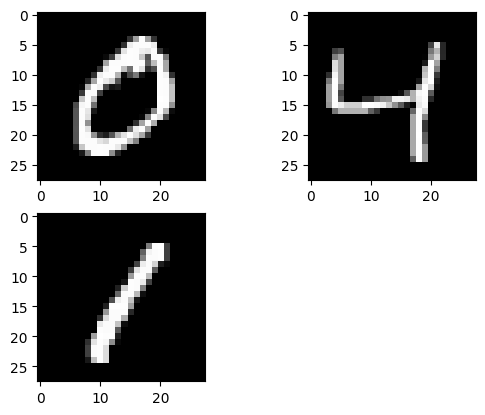

In [4]:
import matplotlib.pyplot as plt
print(train_images[0].shape)
for i in range(1, 4):
    plt.subplot(220 + i)
    plt.imshow(train_images[i], cmap="gray")

plt.show()

MNIST database of handwritten digits. 60000 images for training and 10000 for evaluation.

In [5]:
num_classes = 10
input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        # keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        # keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,786 (296.04 KB)

 Trainable params: 75,786 (296.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics=[
        keras.metrics.CategoricalCrossentropy(name="acc")
    ]
)

In [8]:
eval_labels.shape

(10000,)

In [9]:
dot_img_file = 'model_graph.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

/home/tugdual/aday/MNIST_with_CNN/test/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


AttributeError: 'Sequential' object has no attribute 'training'

In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="checkpoints/model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
    keras.callbacks.TensorBoard('./logs', update_freq=1)
]

model.fit(
    train_images,
    keras.utils.to_categorical(train_labels, num_classes=10),
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
    # verbose="2",
)
score = model.evaluate(eval_images, eval_labels, verbose=1)
